In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) 
df = pd.read_csv("C:\\Users\\HUAWEI\\Desktop\\project\\Covid Data Analysis\\owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350083 entries, 0 to 350082
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350083 non-null  object 
 1   continent                                   333418 non-null  object 
 2   location                                    350083 non-null  object 
 3   date                                        350083 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [4]:
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37995
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337899
excess_mortality_cumulative                337899
excess_mortality                           337899
excess_mortality_cumulative_per_million    337899
Length: 67, dtype: int64

In [5]:
[features for features in df.columns if df[features].isnull().sum()>0]

['continent',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',


In [6]:
columns_to_drop = ['new_deaths_smoothed','new_cases_per_million','new_cases_smoothed_per_million','new_deaths_per_million',
 'new_deaths_smoothed_per_million','new_vaccinations_smoothed','icu_patients_per_million', 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million', 'handwashing_facilities',
 'hospital_beds_per_thousand','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative',
 'excess_mortality','excess_mortality_cumulative_per_million','new_vaccinations_smoothed','total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','tests_units','stringency_index','aged_70_older', 
 'gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence']  

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'total_deaths_per_million',
       'reproduction_rate', 'icu_patients', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'population_density', 'median_age', 'aged_65_older',
       'female_smokers', 'male_smokers', 'life_expectancy', 'population'],
      dtype='object')

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['continent',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'reproduction_rate',
 'icu_patients',
 'hosp_patients',
 'hosp_patients_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'population_density',
 'median_age',
 'aged_65_older',
 'female_smokers',
 'male_smokers',
 'life_expectancy']

In [9]:
columns_to_drop = ['total_cases_per_million','total_deaths_per_million','reproduction_rate',
 'icu_patients','hosp_patients','hosp_patients_per_million','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed',
 'new_tests_smoothed_per_thousand','tests_per_case','people_fully_vaccinated','total_boosters','new_vaccinations','total_boosters',
 'new_cases_smoothed','new_tests','new_deaths','new_cases','positive_rate']

df.drop(columns=columns_to_drop, inplace=True)

In [10]:
pd.set_option('display.max_columns', None) 
df

,iso_code,continent,location,date,total_cases,total_deaths,total_tests,total_vaccinations,people_vaccinated,population_density,median_age,aged_65_older,female_smokers,male_smokers,life_expectancy,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,NaN,NaN,64.83,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,NaN,NaN,64.83,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,NaN,NaN,64.83,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,NaN,NaN,64.83,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,NaN,NaN,64.83,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350078,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,5718.0,NaN,NaN,NaN,42.729,19.6,2.822,1.6,30.7,61.49,16320539.0
350079,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,5718.0,NaN,NaN,NaN,42.729,19.6,2.822,1.6,30.7,61.49,16320539.0
350080,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,5718.0,NaN,NaN,NaN,42.729,19.6,2.822,1.6,30.7,61.49,16320539.0
350081,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,5718.0,NaN,NaN,NaN,42.729,19.6,2.822,1.6,30.7,61.49,16320539.0


In [11]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'total_deaths', 'total_tests', 'total_vaccinations',
       'people_vaccinated', 'population_density', 'median_age',
       'aged_65_older', 'female_smokers', 'male_smokers', 'life_expectancy',
       'population'],
      dtype='object')

In [12]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].isnull().sum())
    print()

Column: iso_code
0

Column: continent
16665

Column: location
0

Column: date
0

Column: total_cases
37995

Column: total_deaths
59582

Column: total_tests
270696

Column: total_vaccinations
270775

Column: people_vaccinated
274172

Column: population_density
52907

Column: median_age
73718

Column: aged_65_older
83377

Column: female_smokers
146426

Column: male_smokers
149196

Column: life_expectancy
28013

Column: population
0



In [13]:
#How have the total COVID-19 cases and deaths evolved over time globally or by continent?
global_cases_deaths = df.groupby('date')[['total_cases', 'total_deaths']].sum()

In [14]:
global_cases_deaths

,total_cases,total_deaths
date,,
2020-01-01,0.0,0.0
2020-01-02,0.0,0.0
2020-01-03,0.0,0.0
2020-01-04,14.0,0.0
2020-01-05,9.0,15.0
...,...,...
2023-10-19,0.0,0.0
2023-10-20,0.0,0.0
2023-10-21,0.0,0.0


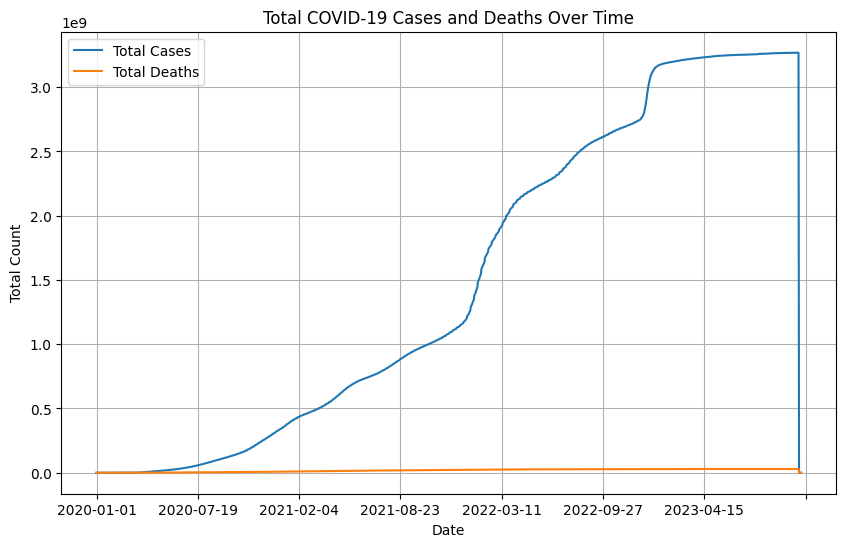

In [15]:
global_cases_deaths.plot(kind='line', figsize=(10, 6))
plt.title('Total COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.grid(True)
plt.legend(['Total Cases', 'Total Deaths'])
plt.show()

In [16]:
#Are there any notable differences in the trajectory of the pandemic between different regions or countries?
location_cases_deaths = df.groupby('location')[['total_cases', 'total_deaths']].sum()

In [17]:
location_cases_deaths

,total_cases,total_deaths
location,,
Afghanistan,1.791037e+08,7.184231e+06
Africa,1.083214e+10,2.323232e+08
Albania,2.591607e+08,3.281955e+06
Algeria,2.430798e+08,6.427556e+06
American Samoa,4.486475e+06,1.842600e+04
...,...,...
Western Sahara,0.000000e+00,0.000000e+00
World,4.922466e+11,5.982427e+09
Yemen,1.053463e+07,1.995179e+06


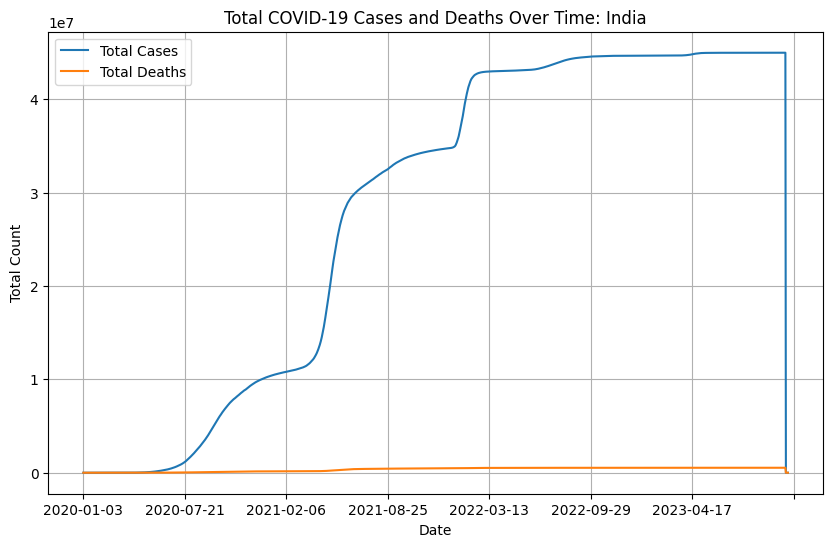

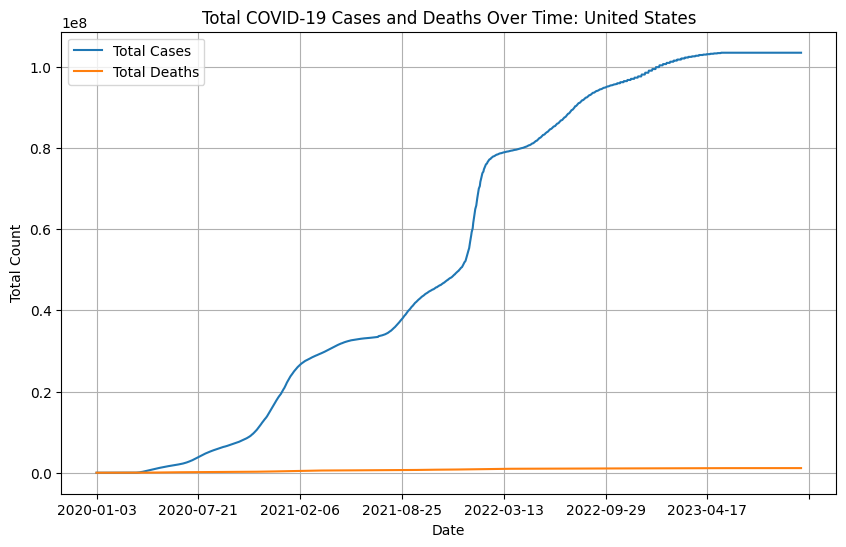

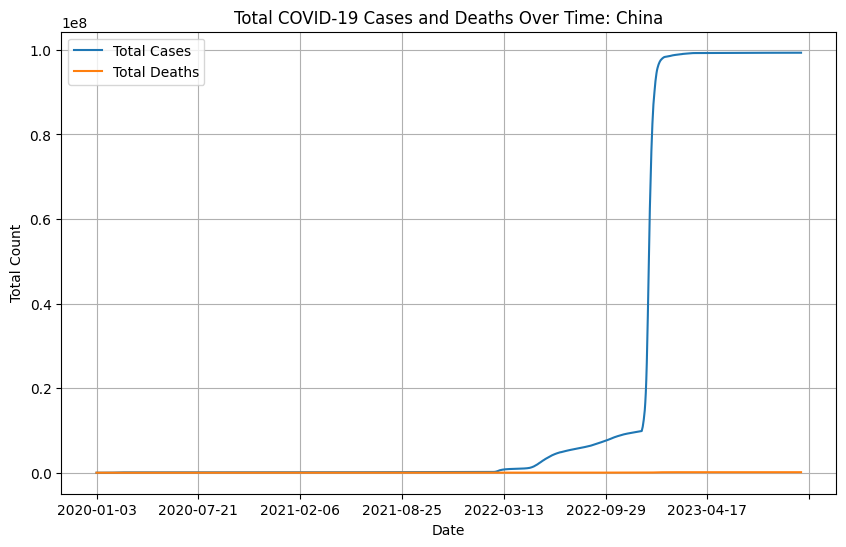

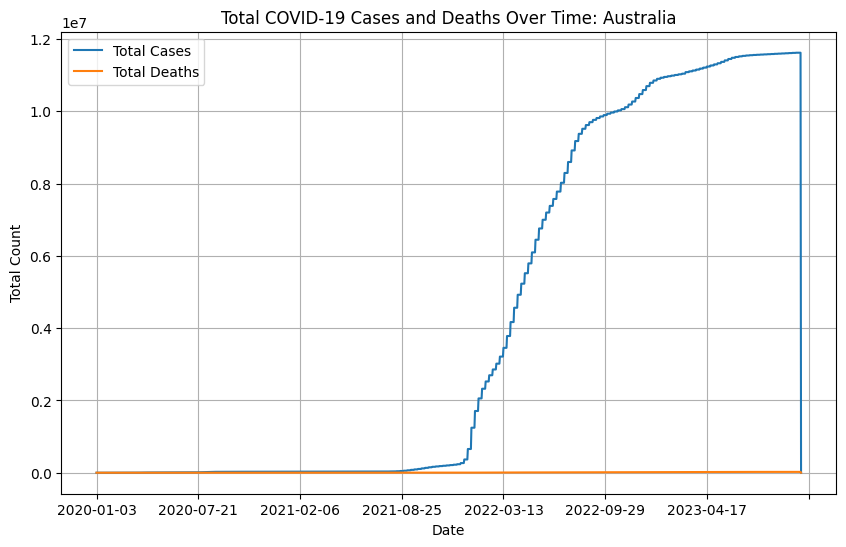

In [18]:
cases_deaths_by_location = df.groupby(['location', 'date'])[['total_cases', 'total_deaths']].sum()

# Plotting the data for selected locations (e.g., countries or regions)
selected_locations = ['India','United States','China','Australia']
for location in selected_locations:
    data_for_location = cases_deaths_by_location.loc[location]
    data_for_location.plot(kind='line', figsize=(10, 6))
    plt.title(f'Total COVID-19 Cases and Deaths Over Time: {location}')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
    plt.legend(['Total Cases', 'Total Deaths'])
    plt.show()

In [19]:
#What is the overall testing rate and positivity rate for COVID-19 tests?
data_for_india = df[df['location'] == 'India']
total_tests = data_for_india['total_tests'].sum()
total_positive_tests = data_for_india['total_cases'].sum()                                    

In [20]:
data_for_india.head(2)

,iso_code,continent,location,date,total_cases,total_deaths,total_tests,total_vaccinations,people_vaccinated,population_density,median_age,aged_65_older,female_smokers,male_smokers,life_expectancy,population
139773,IND,Asia,India,2020-01-03,NaN,NaN,NaN,NaN,NaN,450.419,28.2,5.989,1.9,20.6,69.66,1.417173e+09
139774,IND,Asia,India,2020-01-04,NaN,NaN,NaN,NaN,NaN,450.419,28.2,5.989,1.9,20.6,69.66,1.417173e+09


In [21]:
total_tests

296477930381.0

In [22]:
total_positive_tests

39108181032.0

In [23]:
population = df['population'].sum()
testing_rate = total_tests / population * 1_000_000
positivity_rate = (total_positive_tests / total_tests) * 100 

print(f"Overall Testing Rate in India: {testing_rate:.2f} tests per milolion population")
print(f"Overall Positivity Rate in India: {positivity_rate:.2f}%")          

Overall Testing Rate in India: 6592.35 tests per milolion population
Overall Positivity Rate in India: 13.19%


In [27]:
# Is there any correlation between testing rates and positivity rates across country India?
data_for_india['testing_rate'] = data_for_india['total_tests'] / data_for_india['population'] * 1_000_000
data_for_india['positivity_rate'] = (data_for_india['total_cases'] / data_for_india['total_tests']) * 100
data_for_india.dropna(subset=['testing_rate', 'positivity_rate'], inplace=True)

correlation_coefficient = data_for_india['testing_rate'].corr(data_for_india['positivity_rate'])
print(f"Correlation Coefficient between Testing Rate and Positivity Rate in India: {correlation_coefficient:.2f}")

Correlation Coefficient between Testing Rate and Positivity Rate in India: -0.27


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18468\1146380729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_india['testing_rate'] = data_for_india['total_tests'] / data_for_india['population'] * 1_000_000
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18468\1146380729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_india['positivity_rate'] = (data_for_india['total_cases'] / data_for_india['total_tests']) * 100
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18468\1146380729.py:4: Sett

In [32]:
#What is the total number of COVID-19 vaccinations administered worldwide?#
total_vaccinations_worldwide = df['total_vaccinations'].sum()
print(f"Total number of COVID-19 vaccinations administered worldwide: {total_vaccinations_worldwide}")

Total number of COVID-19 vaccinations administered worldwide: 35367182493993.0


In [40]:
#How does the vaccination coverage vary across different countries or continents?
df['vaccination_coverage'] = df['total_vaccinations'] / df['population']
average_vaccination_coverage_by_continent = df.groupby('continent')['vaccination_coverage'].mean()
print("\nAverage vaccination coverage by continent:")
print(average_vaccination_coverage_by_continent)


Average vaccination coverage by continent:
continent
Africa           0.300093
Asia             1.215314
Europe           1.322118
North America    1.169732
Oceania          1.247140
South America    1.425872
Name: vaccination_coverage, dtype: float64


In [41]:
vaccination_coverage_by_country = df.groupby('location')['vaccination_coverage'].max()
print("\nVaccination coverage by country:")
print(vaccination_coverage_by_country)


Vaccination coverage by country:
location
Afghanistan       0.529151
Africa            0.599493
Albania           1.086324
Algeria           0.340008
American Samoa         NaN
                    ...   
Western Sahara         NaN
World             1.694655
Yemen             0.038214
Zambia            0.672117
Zimbabwe          0.748919
Name: vaccination_coverage, Length: 255, dtype: float64


In [42]:
#How does the median age of a population correlate with COVID-19 outcomes such as total cases or deaths?
correlation_cases = df['median_age'].corr(df['total_cases'])
correlation_deaths = df['median_age'].corr(df['total_deaths'])

print(f"Correlation coefficient between median age and total cases: {correlation_cases:.2f}")
print(f"Correlation coefficient between median age and total deaths: {correlation_deaths:.2f}")

Correlation coefficient between median age and total cases: 0.05
Correlation coefficient between median age and total deaths: 0.04


In [45]:
#Are countries with a higher percentage of elderly population (aged 65 and older) experiencing higher death rates.
df['death_rate_per_million'] = (df['total_deaths'] / df['population'])
correlation_death_aged_65 = df['aged_65_older'].corr(df['death_rate_per_million'])

print(f"Correlation coefficient between percentage of population aged 65 and older and death rate per million: {correlation_death_aged_65:.2f}")

Correlation coefficient between percentage of population aged 65 and older and death rate per million: 0.48


In [51]:
# Do people with higher rates of smoking (male and female) exhibit different COVID-19 outcomes compared to those with lower rates?
df['case_rate_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
correlation_male_smokers_cases = df['male_smokers'].corr(df['case_rate_per_million'])
correlation_female_smokers_cases = df['female_smokers'].corr(df['case_rate_per_million'])

print(f"Correlation coefficient between male smokers and case rate per million: {correlation_male_smokers_cases:.2f}")
print(f"Correlation coefficient between female smokers and case rate per million: {correlation_female_smokers_cases:.2f}")

Correlation coefficient between male smokers and case rate per million: 0.06
Correlation coefficient between female smokers and case rate per million: 0.41


In [56]:
df['death_rate_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000
correlation_male_smokers_deaths = df['male_smokers'].corr(df['death_rate_per_million'])
correlation_female_smokers_deaths = df['female_smokers'].corr(df['death_rate_per_million'])

print(f"Correlation coefficient between male smokers and total deaths per million: {correlation_male_smokers_deaths:.2f}")
print(f"Correlation coefficient between female smokers and total deaths per million: {correlation_female_smokers_deaths:.2f}")

Correlation coefficient between male smokers and total deaths per million: 0.13
Correlation coefficient between female smokers and total deaths per million: 0.46
